In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [9]:
df['area'].value_counts()

area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64

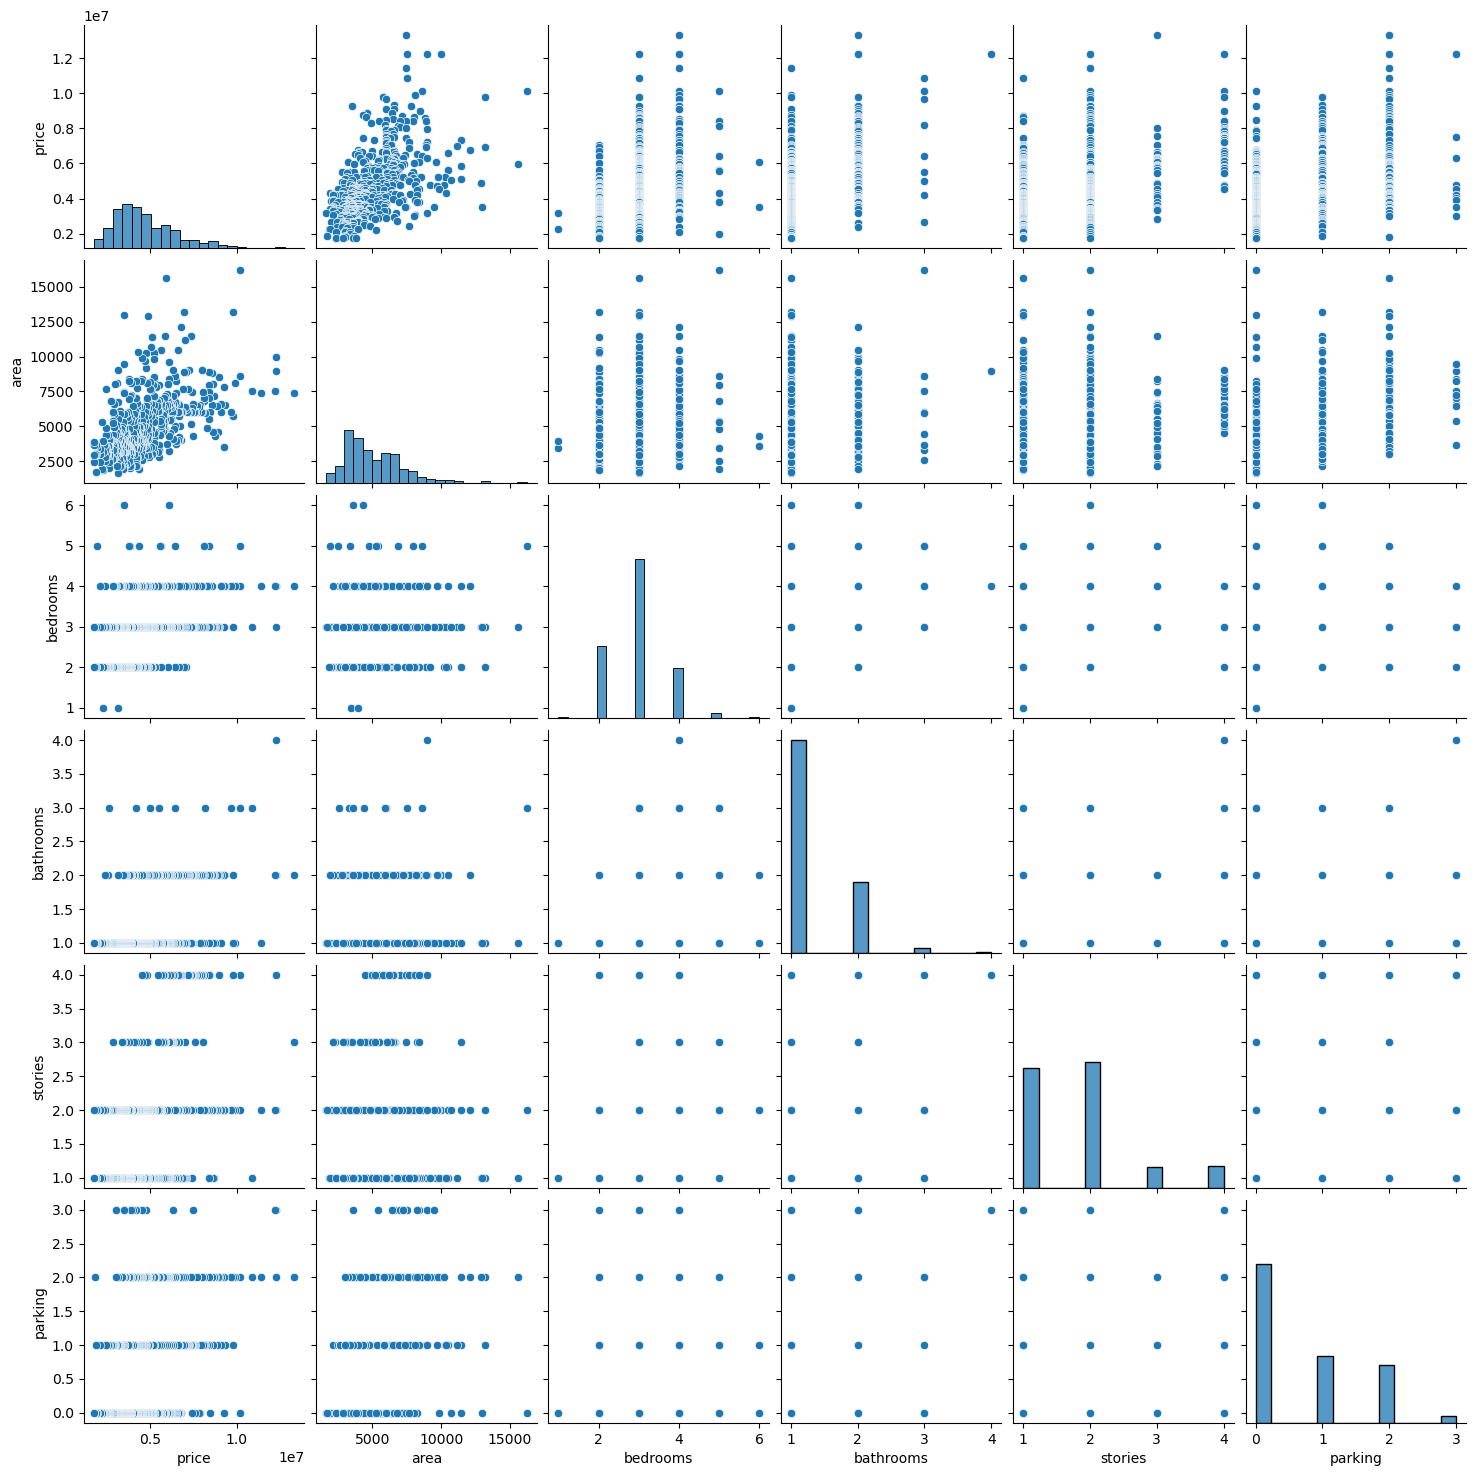

In [10]:
sns.pairplot(df)
plt.show()

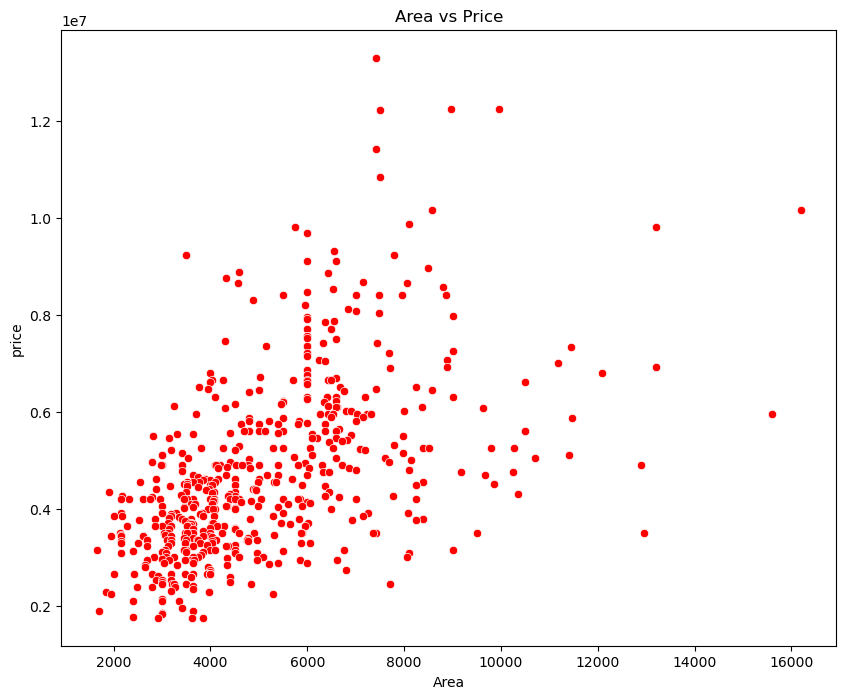

In [11]:
plt.figure(figsize = (10,8))
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('price')
sns.scatterplot(df,x = 'area',y = 'price',markers= 'O',color = 'red')
plt.show()
          

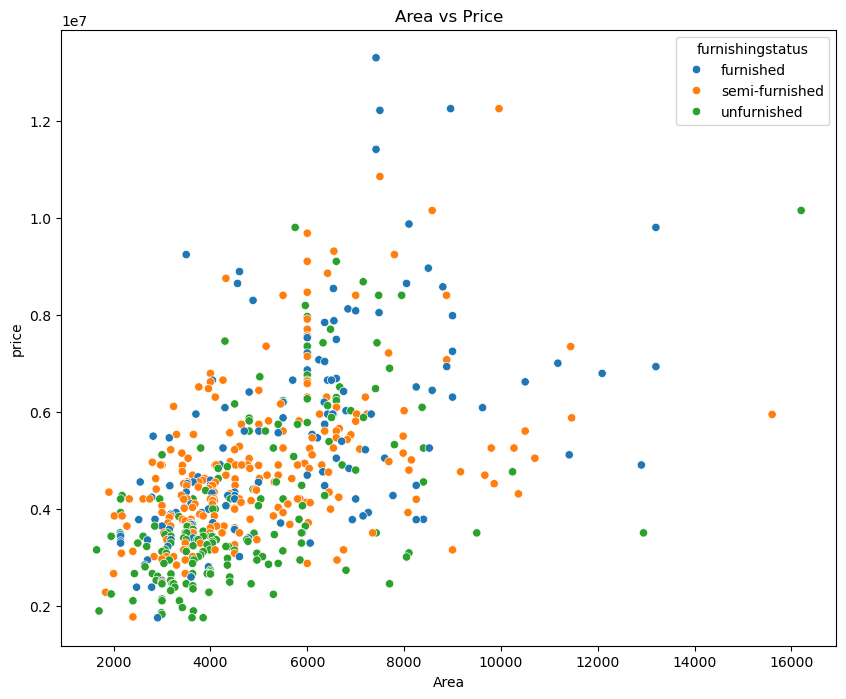

In [12]:
plt.figure(figsize = (10,8))
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('price')
sns.scatterplot(df,x = 'area',y = 'price',hue = 'furnishingstatus',color = 'rbg')
plt.show()
          

<Axes: ylabel='area'>

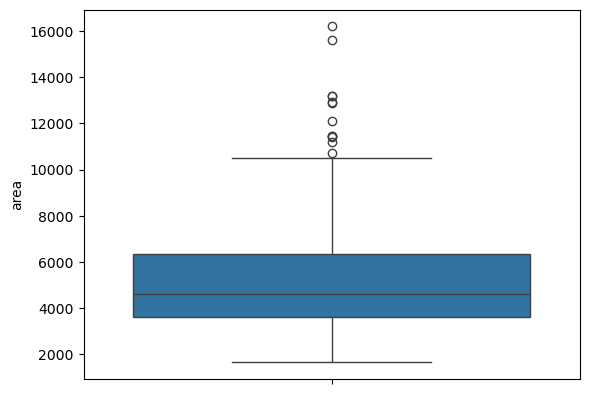

In [13]:
sns.boxplot(df['area'])

<Axes: ylabel='price'>

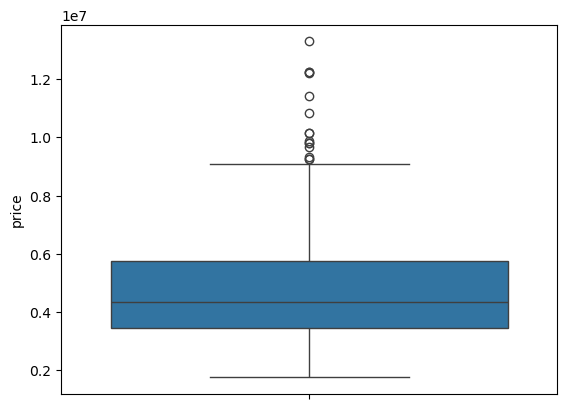

In [14]:
sns.boxplot(df['price'])

## OUTLIER HANDLING

In [15]:
Q3 = df['area'].quantile(0.75)
Q1 = df['area'].quantile(0.25)
IQR = Q3-Q1
upper_fence = Q3+1.5*IQR
lower_fence = Q1 - 1.5*IQR
upper_fence,lower_fence

(10500.0, -540.0)

In [16]:
Q3 = df['price'].quantile(0.75)
Q1 = df['price'].quantile(0.25)
IQR = Q3-Q1
upper_ = Q3+1.5*IQR
lower_ = Q1 - 1.5*IQR
upper_,lower_

(9205000.0, -35000.0)

In [17]:
df = df[(df['area']>= lower_fence) & (df['area']<= upper_fence)]
df =  df[(df['price']>= lower_) & (df['price']<= upper_)]

In [18]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


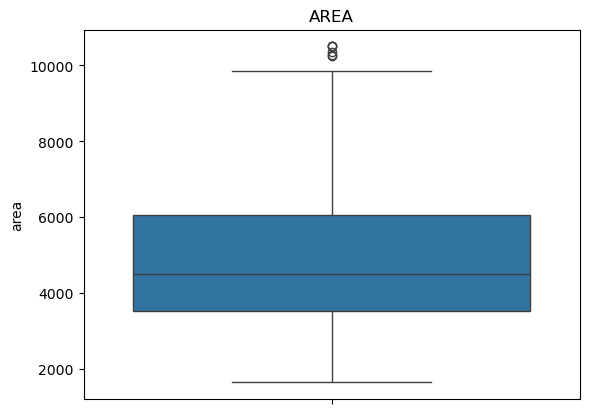

In [19]:
plt.title('AREA')
sns.boxplot(df['area'])
plt.show()

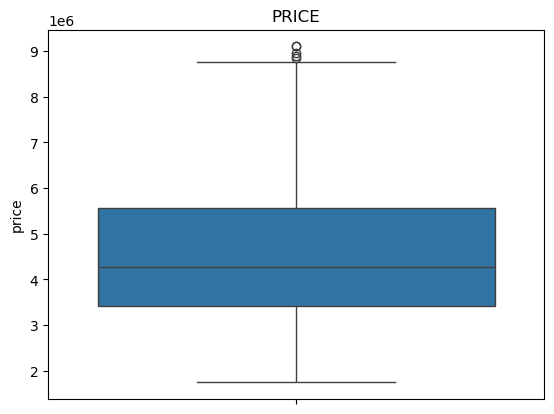

In [20]:
plt.title('PRICE')
sns.boxplot(df['price'])
plt.show()

In [21]:
df.index[df['area'] > upper_fence]

Index([], dtype='int64')

In [22]:

df.index[df['price'] > upper_]

Index([], dtype='int64')

In [23]:
df['furnishingstatus'].unique()
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':2, 'semi-furnished':1, 'unfurnished':0})
df['furnishingstatus']

15     1
16     0
17     2
18     2
19     1
      ..
540    0
541    1
542    0
543    2
544    0
Name: furnishingstatus, Length: 520, dtype: int64

In [24]:
df['furnishingstatus'].unique()

array([1, 0, 2], dtype=int64)

In [25]:
col = ['mainroad','guestroom','basement','hotwaterheating',	'airconditioning','prefarea']
df1 = df.copy()
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,1
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,0
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,2
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,2
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,2


In [26]:
## converted all the values[yes,no] into integer values [yes = 1, no=0]

df1 = pd.get_dummies(df1,columns=col,drop_first=True,dtype =int)
df1

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
15,9100000,6000,4,1,2,2,1,1,0,1,0,0,0
16,9100000,6600,4,2,2,1,0,1,1,1,0,1,1
17,8960000,8500,3,2,4,2,2,1,0,0,0,1,0
18,8890000,4600,3,2,2,2,2,1,1,0,0,1,0
19,8855000,6420,3,2,2,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,1,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,0,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,2,0,0,0,0,0,0


In [27]:
df = df1
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
15,9100000,6000,4,1,2,2,1,1,0,1,0,0,0
16,9100000,6600,4,2,2,1,0,1,1,1,0,1,1
17,8960000,8500,3,2,4,2,2,1,0,0,0,1,0
18,8890000,4600,3,2,2,2,2,1,1,0,0,1,0
19,8855000,6420,3,2,2,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,1,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,0,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,2,0,0,0,0,0,0


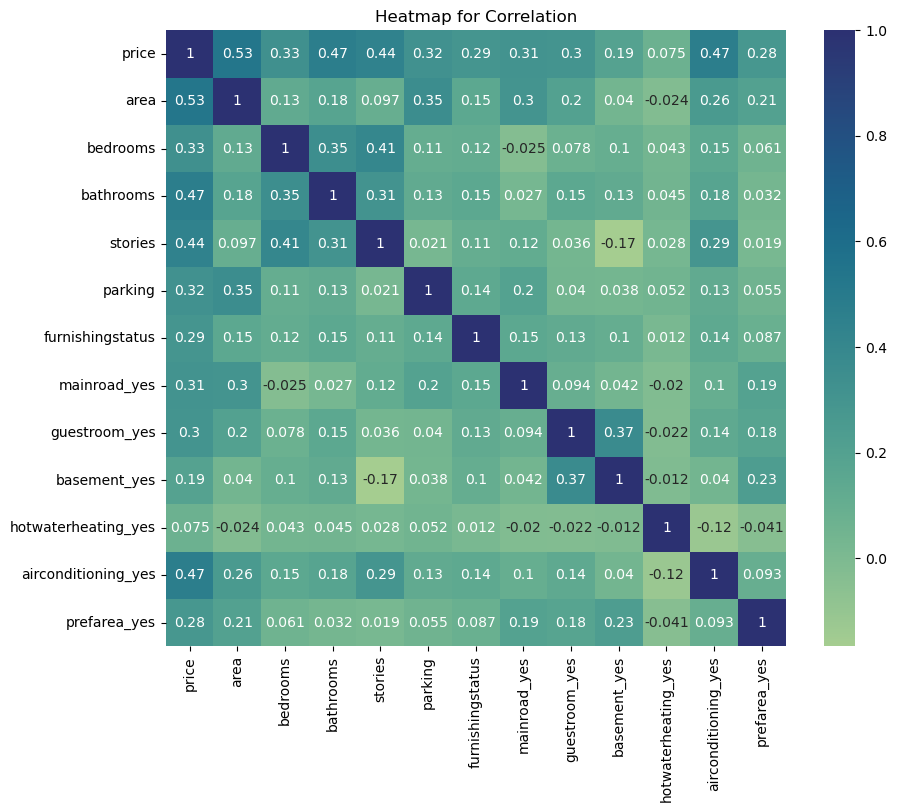

In [28]:
plt.figure(figsize = (10,8))
plt.title('Heatmap for Correlation')
sns.heatmap(df.corr(),annot = True , cmap = 'crest')
plt.show()

In [29]:
x = df.drop('price',axis = 1)
y= df.price

In [30]:
x.shape

(520, 12)

In [31]:
y.shape

(520,)

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
xtrain.shape,xtest.shape

((416, 12), (104, 12))

In [34]:
from sklearn.preprocessing import MinMaxScaler
minmax  =MinMaxScaler()
x_train = minmax.fit_transform(x)
#x_test = minmax.transform(xtest)
x_train

array([[0.49152542, 0.6       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55932203, 0.6       , 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.7740113 , 0.4       , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.22259887, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14237288, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24858757, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = model,n_features_to_select=5)
rfe.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [37]:
rfe.predict(x)

array([3777922.15412485, 7144356.81604247, 6386247.0510263 ,
       6386247.0510263 , 7144356.81604247, 4686335.49179375,
       6386247.0510263 , 5073883.26937808, 6386247.0510263 ,
       6386247.0510263 , 7144356.81604247, 7144356.81604247,
       3777922.15412485, 5998699.27344198, 7144356.81604247,
       6386247.0510263 , 5073883.26937808, 7144356.81604247,
       6402649.7174213 , 5073883.26937808, 6386247.0510263 ,
       6756809.03845814, 6386247.0510263 , 5073883.26937808,
       6386247.0510263 , 5831993.03439424, 7144356.81604247,
       6386247.0510263 , 5090285.93577308, 6386247.0510263 ,
       6386247.0510263 , 6386247.0510263 , 5831993.03439424,
       5090285.93577308, 7144356.81604247, 5848395.70078924,
       5073883.26937808, 6386247.0510263 , 6386247.0510263 ,
       6386247.0510263 , 5073883.26937808, 7144356.81604247,
       6386247.0510263 , 6386247.0510263 , 5090285.93577308,
       5073883.26937808, 6386247.0510263 , 7144356.81604247,
       6386247.0510263 ,

In [38]:
list(zip(x.columns,rfe.support_,rfe.ranking_))

[('area', False, 8),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', False, 3),
 ('parking', False, 4),
 ('furnishingstatus', False, 6),
 ('mainroad_yes', True, 1),
 ('guestroom_yes', False, 2),
 ('basement_yes', False, 5),
 ('hotwaterheating_yes', True, 1),
 ('airconditioning_yes', True, 1),
 ('prefarea_yes', True, 1)]

In [39]:
cols = x.columns[rfe.support_]
cols

Index(['bathrooms', 'mainroad_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes'],
      dtype='object')

In [40]:
x_train_rfe = x[cols]

df1 = x_train_rfe.reset_index()
df1

,index,bathrooms,mainroad_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,15,1,1,0,0,0
1,16,2,1,0,1,1
2,17,2,1,0,1,0
3,18,2,1,0,1,0
4,19,2,1,0,1,1
...,...,...,...,...,...,...
515,540,1,1,0,0,0
516,541,1,0,0,0,0
517,542,1,1,0,0,0
518,543,1,0,0,0,0


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['feature'] = df1.columns
vif['vif'] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [42]:
vif    ## all the factors have vif less than 10 so we can continue

,feature,vif
0,index,2.825380
1,bathrooms,5.136219
2,mainroad_yes,5.088826
3,hotwaterheating_yes,1.067050
4,airconditioning_yes,1.664355
5,prefarea_yes,1.377018


In [43]:
x =df1
y = df.price

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
model.fit(xtrain,ytrain)

LinearRegression()

In [46]:
y_pred = model.predict(xtest)


In [47]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(ytest,y_pred)

0.9282354614398995

In [48]:
mean_squared_error(ytest,y_pred)

223612223880.10007

In [49]:
from sklearn.linear_model import Lasso , Ridge , ElasticNet

In [52]:
from sklearn.model_selection import GridSearchCV
models = {
    'Lasso': (Lasso(), {'alpha': [0.1, 1, 10]}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1, 10]})
    #'ElasticNet': (ElasticNet(), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]})
}
grd = GridSearchCV(model,param_grid=models,verbose = True,cv=5)
grd.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


ValueError: Invalid parameter 'Lasso' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [ ]:
models = {
    'Lasso': (Lasso(), {'alpha': [0.1, 1, 10]}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1, 10]}),
    'ElasticNet': (ElasticNet(), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]})
}
best_models = {}
for model_name, (model, params) in models.items():
    grd = GridSearchCV(model, param_grid=params, verbose=True, cv=5)
    grd.fit(xtrain, ytrain)
    best_models[model_name] = grd.best_estimator_

In [ ]:
grd.best_estimator_

In [ ]:
lr = ElasticNet(alpha=1)
lr.fit(xtrain,ytrain)

In [ ]:
y_pred = lr.predict(xtest)

In [ ]:
r2_score(ytest,y_pred)